In [232]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [36]:
# Ali-Mikhail-Haq , theta in [-1,1)
def phi_1(t,theta=0.5):
    return np.log( (1-theta*(1-t))/t )

def phi(t,theta=0.5):
    return (1-theta)/(np.exp(t)-theta)

theta_u = 0.0
theta_v = 0.999

In [230]:
# Clayton , theta in [-1,inf)\{0}
def phi_1(t,theta=0.5):
    return (t**(-theta)-1)/theta

def phi(t,theta=0.5):
    return (1+theta*t)**(-1/theta)

theta_u = 0.0001
theta_v = 4

In [223]:
# Gumbel , theta in [1,inf)
def phi_1(t,theta=0.5):
    return (-np.log(t))**theta

def phi(t,theta=0.5):
    return np.exp(-t**(1/theta))

theta_u = 1.0
theta_v = 4

In [52]:
def ot(u, i, theta_u, theta_v):
    S = np.sum(phi_1(u, theta_u))
    Su = phi_1(phi(S, theta_u), theta_v)
    si = phi_1(u[i], theta_u)
    return phi(Su*si/S,theta_v)

In [53]:
u = np.random.rand(2)
u

array([ 0.45747716,  0.84928578])

In [54]:
d = 0.0001

d0 = np.array([d, 0.0])
d1 = np.array([0.0, d])

In [67]:
(ot(u+d1, 0, theta_u, theta_v) - ot(u-d1, 0, theta_u, theta_v))/(2*d)

0.41123358958089495

In [68]:
(ot(u+d0, 1, theta_u, theta_v) - ot(u-d0, 1, theta_u, theta_v))/(2*d)

0.74672281029558585

In [69]:
(ot(u+d0, 0, theta_u, theta_v) - ot(u-d0, 0, theta_u, theta_v))/(2*d)

0.8659825056409054

In [70]:
(ot(u+d1, 1, theta_u, theta_v) - ot(u-d1, 1, theta_u, theta_v))/(2*d)

0.66087188700908461

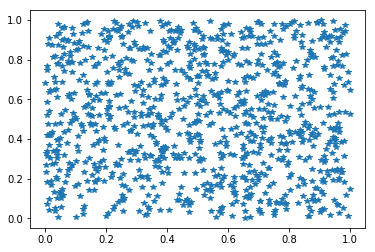

In [201]:
nsamples = 1000
U1 = np.random.rand(nsamples)
U2 = np.random.rand(nsamples)
plt.plot(U1, U2, '*')

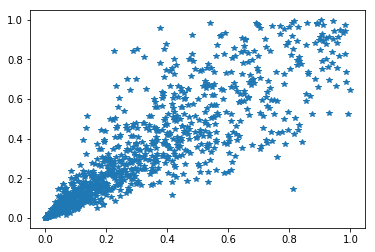

In [233]:
V1 = np.array([ot(np.array([U1[i],U2[i]]), 0, theta_u, theta_v) for i in range(nsamples)])
V2 = np.array([ot(np.array([U1[i],U2[i]]), 1, theta_u, theta_v) for i in range(nsamples)])
plt.plot(V1, V2, '*')

In [203]:
x = arange(0.01,1.0,0.01)
y = arange(0.01,1.0,0.01)
X,Y = meshgrid(x, y) # grid of point

/opt/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


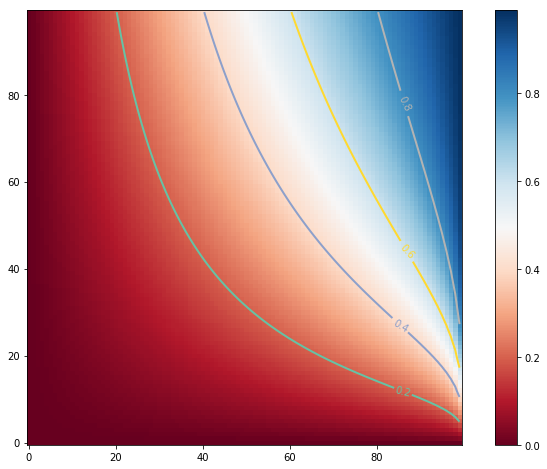

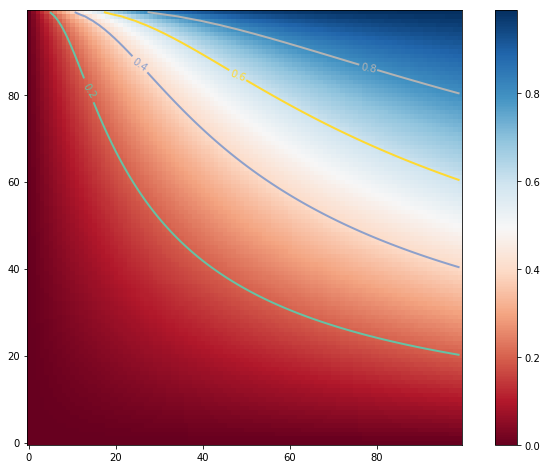

In [234]:
from numpy import exp,arange
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show

# the function that I'm going to plot
def z_func(X,Y, coordinate=0):
    return np.nan_to_num(np.array([ot(np.array([i,j]), coordinate, theta_u, theta_v) for i,j in zip(X.flat,Y.flat)]).reshape(X.shape))
 
def dz_func(X,Y, coordinate=0):    
    if coordinate==0:
        return (z_func(X,Y+d,0)-z_func(X,Y-d,0))/(2*d)
    else:
        return (z_func(X+d,Y,1)-z_func(X-d,Y,1))/(2*d)
    
F = z_func
#F = dz_func
    
x = arange(0.0,1.0,0.01)
y = arange(0.0,1.0,0.01)
X,Y = meshgrid(x, y) # grid of point


Z = F(X, Y, coordinate=0)
plt.figure(figsize=(12,8))
im = imshow(Z,cmap=cm.RdBu, origin='lower') # drawing the function
# adding the Contour lines with labels
cset = contour(Z,arange(-1,1.5,0.2),linewidths=2,cmap=cm.Set2)
clabel(cset,inline=True,fmt='%1.1f',fontsize=10)
colorbar(im) # adding the colobar on the right
# latex fashion title
show()

Z = F(X, Y, coordinate=1)
plt.figure(figsize=(12,8))
im = imshow(Z,cmap=cm.RdBu, origin='lower') # drawing the function
# adding the Contour lines with labels
cset = contour(Z,arange(-1,1.5,0.2),linewidths=2,cmap=cm.Set2)
clabel(cset,inline=True,fmt='%1.1f',fontsize=10)
colorbar(im) # adding the colobar on the right
# latex fashion title
show()

/opt/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


<IPython.core.display.Javascript object>


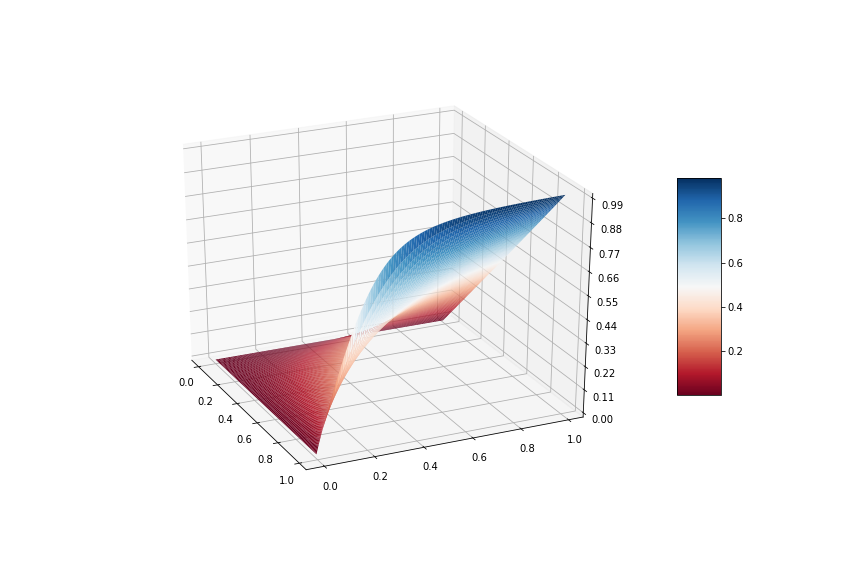

<IPython.core.display.Javascript object>


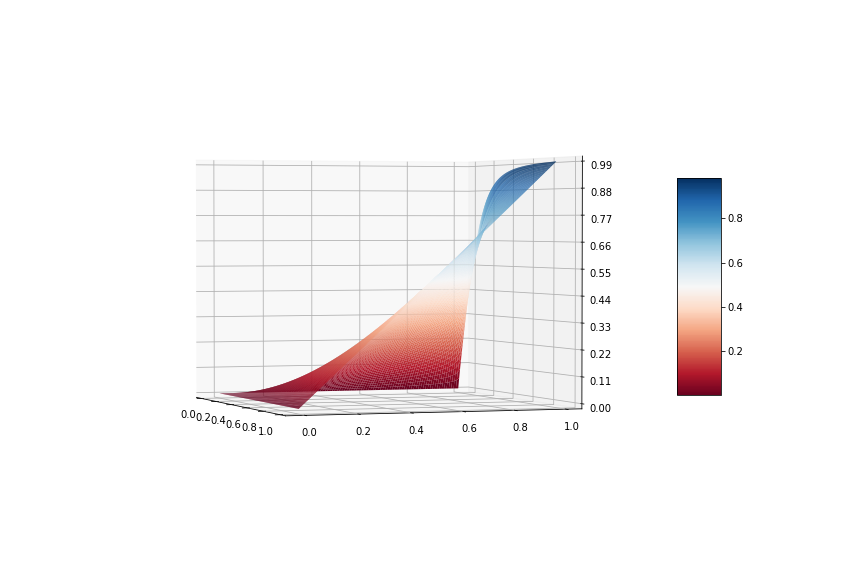

In [235]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt

Z = F(X, Y, coordinate=0)
fig = plt.figure(figsize=(12,8))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                      cmap=cm.RdBu,linewidth=0, antialiased=True)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

 
Z = F(X, Y, coordinate=1)
fig = plt.figure(figsize=(12,8))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                      cmap=cm.RdBu,linewidth=0, antialiased=True)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

/opt/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
/opt/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until


<IPython.core.display.Javascript object>


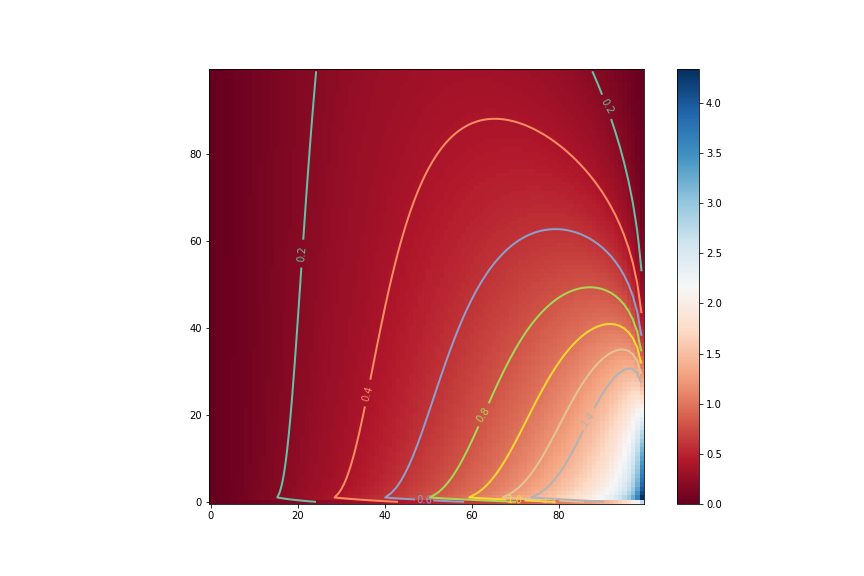

<IPython.core.display.Javascript object>


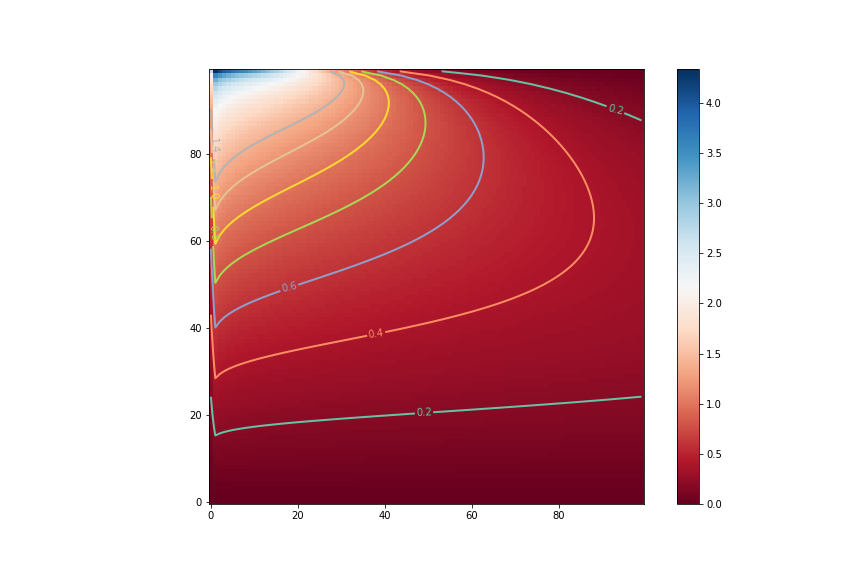

In [236]:
F = dz_func

Z = F(X, Y, coordinate=0)
plt.figure(figsize=(12,8))
im = imshow(Z,cmap=cm.RdBu, origin='lower') # drawing the function
# adding the Contour lines with labels
cset = contour(Z,arange(-1,1.5,0.2),linewidths=2,cmap=cm.Set2)
clabel(cset,inline=True,fmt='%1.1f',fontsize=10)
colorbar(im) # adding the colobar on the right
# latex fashion title
show()

Z = F(X, Y, coordinate=1)
plt.figure(figsize=(12,8))
im = imshow(Z,cmap=cm.RdBu, origin='lower') # drawing the function
# adding the Contour lines with labels
cset = contour(Z,arange(-1,1.5,0.2),linewidths=2,cmap=cm.Set2)
clabel(cset,inline=True,fmt='%1.1f',fontsize=10)
colorbar(im) # adding the colobar on the right
# latex fashion title
show()

/opt/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
/opt/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until


<IPython.core.display.Javascript object>


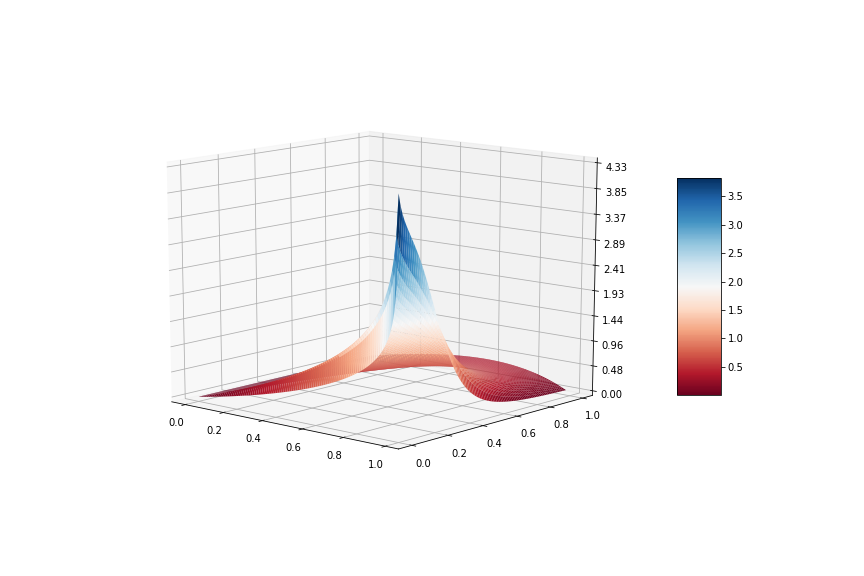

<IPython.core.display.Javascript object>


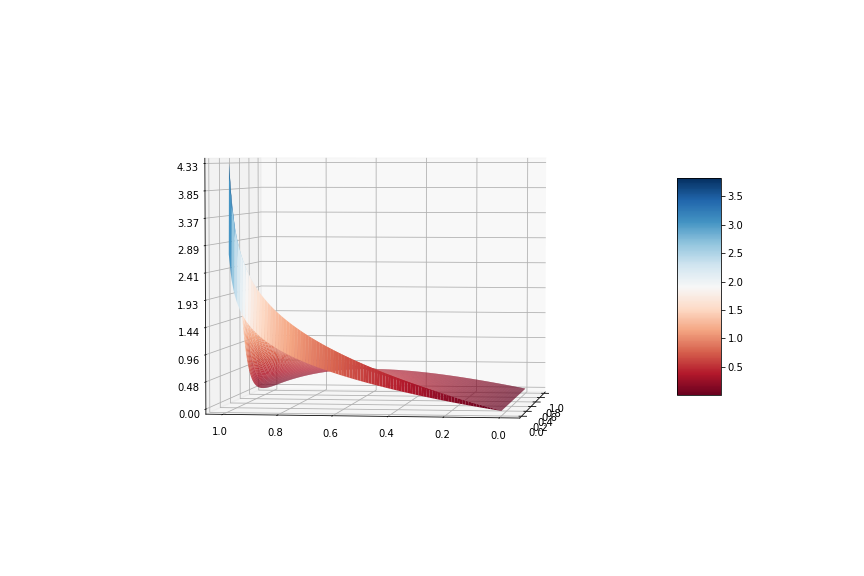

In [237]:

Z = F(X, Y, coordinate=0)
fig = plt.figure(figsize=(12,8))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                      cmap=cm.RdBu,linewidth=0, antialiased=True)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

 
Z = F(X, Y, coordinate=1)
fig = plt.figure(figsize=(12,8))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                      cmap=cm.RdBu,linewidth=0, antialiased=True)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [238]:
np.linalg.norm(dz_func(X, Y, coordinate=0) - dz_func(X, Y, coordinate=1).T)

/opt/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
/opt/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until


0.0

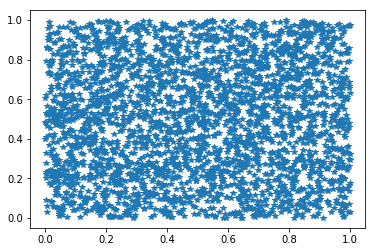

In [603]:
U1 = V1
U2 = V2
V1 = np.array([ot(np.array([U1[i],U2[i]]), 0, theta_v, theta_u) for i in range(nsamples)])
V2 = np.array([ot(np.array([U1[i],U2[i]]), 1, theta_v, theta_u) for i in range(nsamples)])
plt.plot(V1, V2, '*')

In [16]:

import numpy as np
from scipy.optimize import minimize

def ot(x):
    return np.sum(np.abs(x[1:] - x[:-1])**1.08) + np.abs(2 - x[-1])**1.08 + np.abs(x[0]-5)**1.08

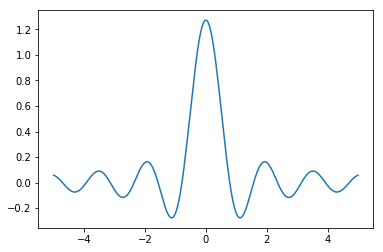

In [41]:
r = np.linspace(-5,5,200)
f = np.sin(4*r)/(np.pi*r)
plt.plot(r,f)

In [2]:
minimize(ot, np.zeros(9))

      fun: 2.724525989949312
 hess_inv: array([[ 1.97056579,  1.6636356 ,  1.57529781,  1.48409324,  1.20635062,
         1.07030343,  0.7674957 ,  0.53961433,  0.23604967],
       [ 1.6636356 ,  4.53715879,  3.94357436,  3.68724068,  2.87929595,
         2.34004248,  1.77104809,  1.33345564,  0.65116607],
       [ 1.57529781,  3.94357436,  6.45223429,  5.81463327,  4.57390815,
         3.66915109,  2.71323022,  2.0837219 ,  1.05856585],
       [ 1.48409324,  3.68724068,  5.81463327,  8.15653914,  6.41877414,
         5.3057743 ,  3.99374268,  2.74474321,  1.41725069],
       [ 1.20635062,  2.87929595,  4.57390815,  6.41877414,  9.04910943,
         7.71948332,  5.26426068,  3.74804381,  1.82318358],
       [ 1.07030343,  2.34004248,  3.66915109,  5.3057743 ,  7.71948332,
         9.13777694,  6.44721461,  4.71017313,  2.36765276],
       [ 0.7674957 ,  1.77104809,  2.71323022,  3.99374268,  5.26426068,
         6.44721461,  7.5376424 ,  5.27372985,  2.64947159],
       [ 0.53961433,  

In [6]:
x = np.arange(5)

In [8]:
x[1:]

array([1, 2, 3, 4])

In [9]:
x[:-1]

array([0, 1, 2, 3])

In [10]:
x[-1]

4